# Build a Traffic Sign Recognition Classifier

## Load The Data

The original data comes from [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).
For the training, the data set is already packed by pickle. Thanks for the team.

If you don't have the pickled data, then you can pack it by yourself or you can test this model via already trained checkpoint.

In [1]:
import pickle


training_file = "data/train.p"
validation_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

In [2]:
import csv


sign_names=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        sign_names.append((row['SignName']))

## Dataset Summary & Exploration

The pickled data is a dictionary with key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.

### Basic Summary of the Data Set

In [3]:
import numpy as np


X_train, Y_train = train['features'], train['labels']
X_valid, Y_valid = valid['features'], valid['labels']
X_test, Y_test = test['features'], test['labels']

sign_classes, class_indices, class_counts = np.unique(Y_train, return_index = True, return_counts = True)

n_train = len(Y_train)
n_validation = len(Y_valid)
n_test = len(Y_test)

image_shape = X_train.shape[1:]

n_classes = len(sign_classes)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### exploratory visualization of the dataset

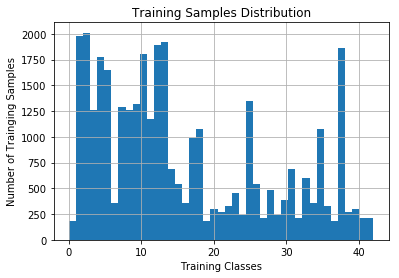

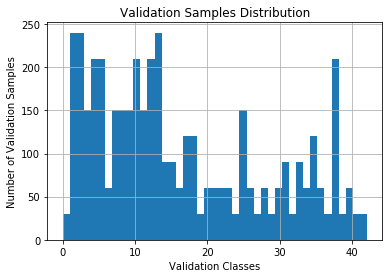

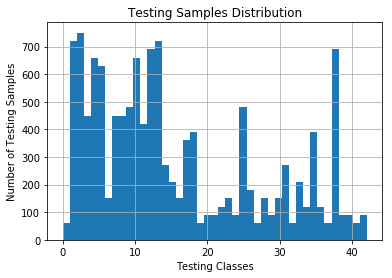

Class 0 180 samples : Speed limit (20km/h)


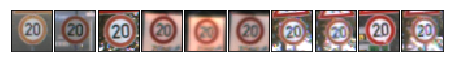

----------------------------------------------------------------
Class 1 1980 samples : Speed limit (30km/h)


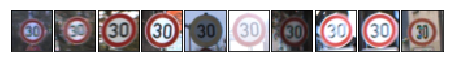

----------------------------------------------------------------
Class 2 2010 samples : Speed limit (50km/h)


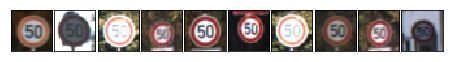

----------------------------------------------------------------
Class 3 1260 samples : Speed limit (60km/h)


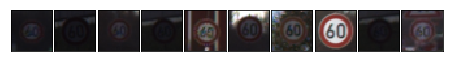

----------------------------------------------------------------
Class 4 1770 samples : Speed limit (70km/h)


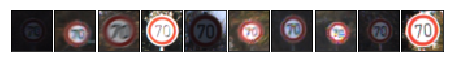

----------------------------------------------------------------
Class 5 1650 samples : Speed limit (80km/h)


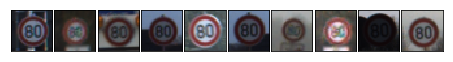

----------------------------------------------------------------
Class 6 360 samples : End of speed limit (80km/h)


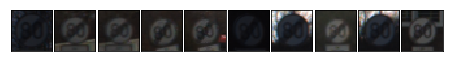

----------------------------------------------------------------
Class 7 1290 samples : Speed limit (100km/h)


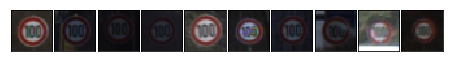

----------------------------------------------------------------
Class 8 1260 samples : Speed limit (120km/h)


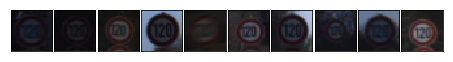

----------------------------------------------------------------
Class 9 1320 samples : No passing


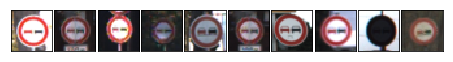

----------------------------------------------------------------
Class 10 1800 samples : No passing for vehicles over 3.5 metric tons


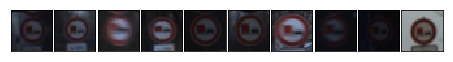

----------------------------------------------------------------
Class 11 1170 samples : Right-of-way at the next intersection


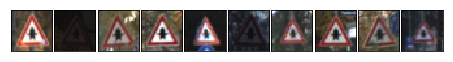

----------------------------------------------------------------
Class 12 1890 samples : Priority road


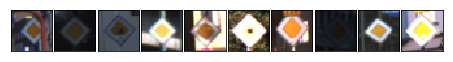

----------------------------------------------------------------
Class 13 1920 samples : Yield


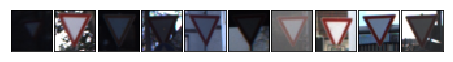

----------------------------------------------------------------
Class 14 690 samples : Stop


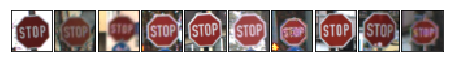

----------------------------------------------------------------
Class 15 540 samples : No vehicles


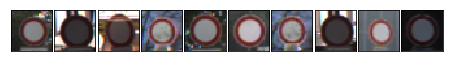

----------------------------------------------------------------
Class 16 360 samples : Vehicles over 3.5 metric tons prohibited


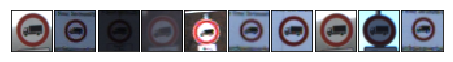

----------------------------------------------------------------
Class 17 990 samples : No entry


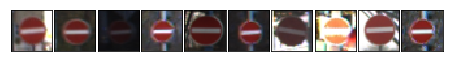

----------------------------------------------------------------
Class 18 1080 samples : General caution


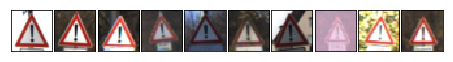

----------------------------------------------------------------
Class 19 180 samples : Dangerous curve to the left


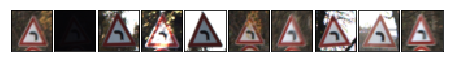

----------------------------------------------------------------
Class 20 300 samples : Dangerous curve to the right


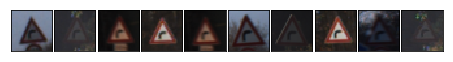

----------------------------------------------------------------
Class 21 270 samples : Double curve


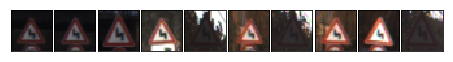

----------------------------------------------------------------
Class 22 330 samples : Bumpy road


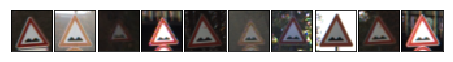

----------------------------------------------------------------
Class 23 450 samples : Slippery road


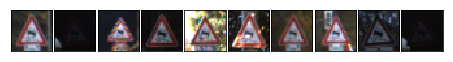

----------------------------------------------------------------
Class 24 240 samples : Road narrows on the right


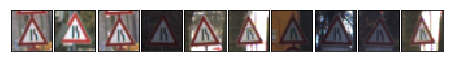

----------------------------------------------------------------
Class 25 1350 samples : Road work


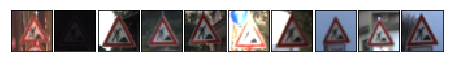

----------------------------------------------------------------
Class 26 540 samples : Traffic signals


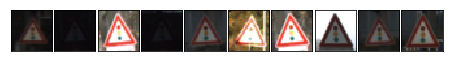

----------------------------------------------------------------
Class 27 210 samples : Pedestrians


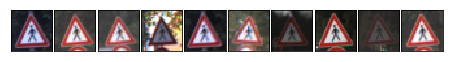

----------------------------------------------------------------
Class 28 480 samples : Children crossing


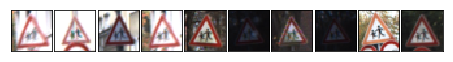

----------------------------------------------------------------
Class 29 240 samples : Bicycles crossing


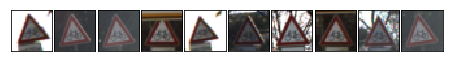

----------------------------------------------------------------
Class 30 390 samples : Beware of ice/snow


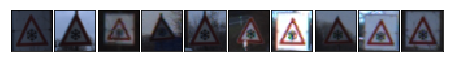

----------------------------------------------------------------
Class 31 690 samples : Wild animals crossing


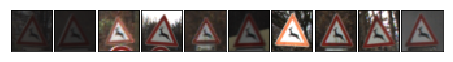

----------------------------------------------------------------
Class 32 210 samples : End of all speed and passing limits


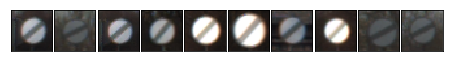

----------------------------------------------------------------
Class 33 599 samples : Turn right ahead


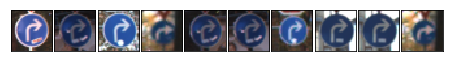

----------------------------------------------------------------
Class 34 360 samples : Turn left ahead


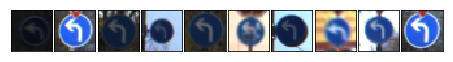

----------------------------------------------------------------
Class 35 1080 samples : Ahead only


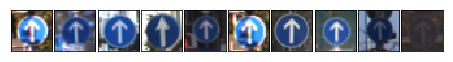

----------------------------------------------------------------
Class 36 330 samples : Go straight or right


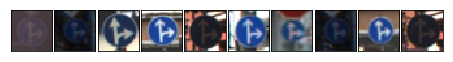

----------------------------------------------------------------
Class 37 180 samples : Go straight or left


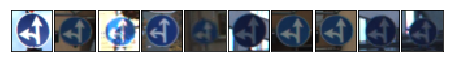

----------------------------------------------------------------
Class 38 1860 samples : Keep right


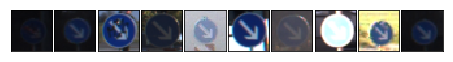

----------------------------------------------------------------
Class 39 270 samples : Keep left


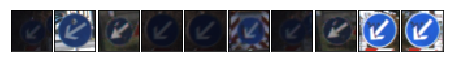

----------------------------------------------------------------
Class 40 300 samples : Roundabout mandatory


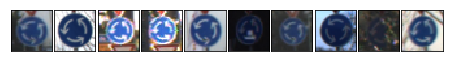

----------------------------------------------------------------
Class 41 210 samples : End of no passing


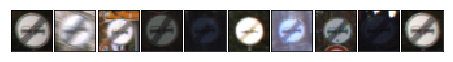

----------------------------------------------------------------
Class 42 210 samples : End of no passing by vehicles over 3.5 metric tons


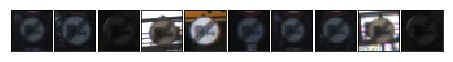

----------------------------------------------------------------


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random 


# Visualizations will be shown in the notebook.
%matplotlib inline

plt.figure(1)
plt.hist(Y_train, n_classes)
plt.xlabel('Training Classes')
plt.ylabel('Number of Trainging Samples')
plt.title('Training Samples Distribution')
plt.grid(True)

plt.figure(2)
plt.hist(Y_valid, n_classes)
plt.xlabel('Validation Classes')
plt.ylabel('Number of Validation Samples')
plt.title('Validation Samples Distribution')
plt.grid(True)

plt.figure(3)
plt.hist(Y_test, n_classes)
plt.xlabel('Testing Classes')
plt.ylabel('Number of Testing Samples')
plt.title('Testing Samples Distribution')
plt.grid(True)
plt.show()

for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print("Class %i %s samples : %s" % (c, str(c_count), sign_names[c]))
    fig = plt.figure(figsize = (6, 1))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.show()
    print("----------------------------------------------------------------")


### Uniform distribution and shuffle

Because there is a lot of difference in the distribution of prepared data, the number of data is leveled and mixed randomly for a more equitable learning.

The data may appear to be duplicated, but I will apply random effects to the data during training. It is therefore aimed to provide a fair number of learning times per label rather than incresing learning frequency with the same data.

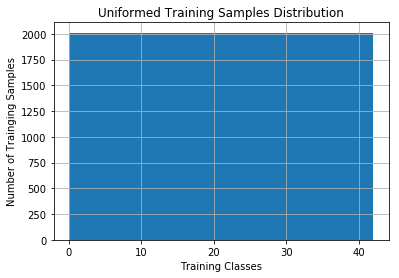

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

def uniform_n_shuffle(features, labels, target):
    index = np.arange(target.shape[0])
    np.random.shuffle(index)

    return features[[target[index]]], labels[target[index]]

new_list = []
target_uniform_max = max(class_counts)

for i in sign_classes:
    orig_list = np.where(Y_train == i)[0]
    new_list.append(orig_list)
    while(len(new_list[i])<target_uniform_max):
        new_list[i] = np.concatenate([new_list[i], orig_list])
    new_list[i] = new_list[i][:target_uniform_max]

uniform_list = np.array(new_list)
uniform_list = uniform_list.reshape(-1)

X_train_uniform, Y_train_uniform = uniform_n_shuffle(X_train, Y_train, uniform_list)

plt.hist(Y_train_uniform, n_classes)
plt.xlabel('Training Classes')
plt.ylabel('Number of Trainging Samples')
plt.title('Uniformed Training Samples Distribution')
plt.grid(True)
plt.show()

----

## Design and Test a Model Architecture


### Pre-process the Data Set

The image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data.

Instead of applying any other preprocessing, I would expect a similar effect by increasing the dimension using the 1x1 filter conv.

Great numpy!

In [6]:
def normalize(images):
    norm_images = (images - 128) / 256
    return norm_images.astype(np.float32)

### Image effect for Augmentation

Image variants for augment are only for learning. It does not apply to validation and testing.

In [7]:
import cv2


def random_brightness(image, ratio):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    brightness = np.float64(hsv[:, :, 2])
    brightness = brightness * (1.0 + np.random.uniform(-ratio, ratio))
    brightness[brightness > 255] = 255
    brightness[brightness < 0] = 0
    hsv[:, :, 2] = brightness
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


def random_rotation(image, angle):
    if angle == 0:
        return image
    angle = np.random.uniform(-angle, angle)
    rows, cols = image.shape[:2]
    size = cols, rows
    center = cols / 2, rows / 2
    scale = 1.0
    rotation = cv2.getRotationMatrix2D(center, angle, scale)
    return cv2.warpAffine(image, rotation, size)


def random_translation(image, translation):
    if translation == 0:
        return 0
    rows, cols = image.shape[:2]
    size = cols, rows
    x = np.random.uniform(-translation, translation)
    y = np.random.uniform(-translation, translation)
    trans = np.float32([[1, 0, x], [0, 1, y]])
    return cv2.warpAffine(image, trans, size)


def random_shear(image, shear):
    if shear == 0:
        return image
    rows, cols = image.shape[:2]
    size = cols, rows
    left, right, top, bottom = shear, cols - shear, shear, rows - shear
    dx = np.random.uniform(-shear, shear)
    dy = np.random.uniform(-shear, shear)
    p1 = np.float32([[left, top], [right, top], [left, bottom]])
    p2 = np.float32([[left + dx, top], [right + dx, top + dy], [left, bottom + dy]])
    move = cv2.getAffineTransform(p1, p2)
    return cv2.warpAffine(image, move, size)


def augment_image(image, brightness=0.7, angle=10, translation=5, shear=2):
    image = random_brightness(image, brightness)
    image = random_rotation(image, angle)
    image = random_translation(image, translation)
    image = random_shear(image, shear)
    return image

def augment(image_list):
    augmenter = lambda x: augment_image(x)
    return np.array([augmenter(image) for image in image_list])

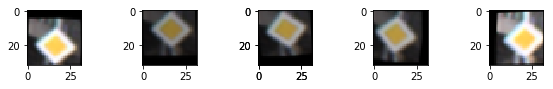

------------------------------------------------------------------------------


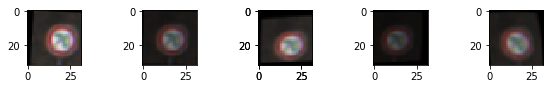

------------------------------------------------------------------------------


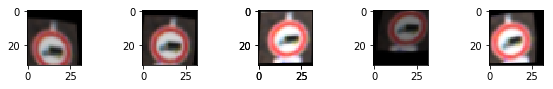

------------------------------------------------------------------------------


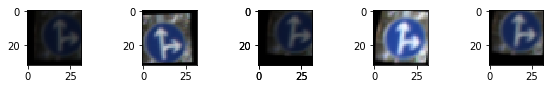

------------------------------------------------------------------------------


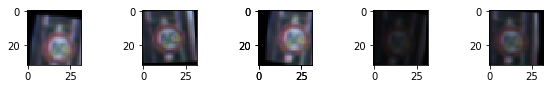

------------------------------------------------------------------------------


In [8]:
import random


random_images = []
for i in range(5):
    random_images.append(random.choice(X_train))
    
    fig = plt.figure(figsize = (10, 1))
    plt.imshow(random_images[i])
    
    for j in range(5):
        processed_image = augment_image(random_images[i])
        axis = fig.add_subplot(1, 5, j + 1)
        axis.imshow(processed_image)
    plt.show()
    print("------------------------------------------------------------------------------")

### Model Architecture

The model is based on LeNet by Yann LeCun. http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

Here is my network summary :

Layer | Desc.
------------ | -------------
Input | 32x32x3
Conv | 1x1x8 filter, 1x1 stride, VALID
relu | 
Conv  | 5x5x32 filter, 1x1 stride, VALID
relu| 
maxpool | 2x2, VALID
Conv | 5x5x64 filter, 1x1 stride VALID
relu|
maxpool | 2x2, VALID
Conv | 3x3x128 filter, 1x1 stride, VALID
relu|
flatten|
dense | 1152x400
dropout|
dense | 400x43
softmax| 

In [9]:
import tensorflow as tf


def traffic_net(input_features, mu=0, sigma=0.1):
    # Layer 1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, 8), mean = mu, stddev = sigma), name='conv1_w')
    conv1_b = tf.Variable(tf.zeros(8), name='conv1_b')
    conv1   = tf.nn.conv2d(input_features, conv1_W, strides=[1, 1, 1, 1], padding='VALID', name='conv1') + conv1_b
    conv1 = tf.nn.relu(conv1, name='relu1')

    # Layer 2
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 8, 32), mean = mu, stddev = sigma, name='conv2_w'))
    conv2_b = tf.Variable(tf.zeros(32), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name='conv2') + conv2_b
    conv2 = tf.nn.relu(conv2, name='relu2')
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 3
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean=mu, stddev=sigma), name='conv3_w')
    conv3_b = tf.Variable(tf.zeros(64), name='conv3_b')
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID', name='conv3') + conv3_b
    conv3 = tf.nn.relu(conv3, name='relu3')
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


    # Layer 4
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean=mu, stddev=sigma), name='conv4_w')
    conv4_b = tf.Variable(tf.zeros(128), name='conv4_b')
    conv4 = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID', name='conv4') + conv4_b
    conv4 = tf.nn.relu(conv4, name='relu4')


    # Flatten
    fc0   = tf.contrib.layers.flatten(conv4)

    # Dense Layer 1
    fc1_W  = tf.Variable(tf.truncated_normal(shape=(1152, 400), mean = mu, stddev = sigma), name='fc1_w')
    fc1_b  = tf.Variable(tf.zeros(400), name='fc1_b')
    fc1    = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1, name='fc1')
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob, name='dropout')

    # Dense Layer 2
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 43), mean = mu, stddev = sigma), name='fc2_w')
    fc2_b  = tf.Variable(tf.zeros(43), name='fc2_b')
    logits = tf.matmul(fc1, fc2_W) + fc2_b

    return logits

In [10]:
rate = 0.001
EPOCHS = 120
BATCH_SIZE = 128
model_name = 'TrafficSign'

x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='X')
y = tf.placeholder(tf.int32, (None), name='Y')
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

logits = traffic_net(x)

with tf.name_scope('train'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate=rate)
    training_operation = optimizer.minimize(loss_operation)
    
tf.summary.scalar('loss', loss_operation)
    

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar('accuracy', accuracy_operation)

<tf.Tensor 'accuracy:0' shape=() dtype=string>

### Train, Validate and Test the Model

After 200 epochs,
Validation set accuracy is over 97% and,
Test set accuracy is 94.4%.

In [11]:
def evaluate(X_data, y_data, tf_summary=False):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    merged = tf.summary.merge_all()
    
    if tf_summary:
        valid_writer = tf.summary.FileWriter('./board/valid', sess.graph)
    
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        batch_x_processed = normalize(batch_x)
        summary, accuracy, predict = sess.run([merged, accuracy_operation, logits], feed_dict={x: batch_x_processed, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
        
        # write summary for validation
        if tf_summary:
            valid_writer.add_summary(summary)

    return total_accuracy / num_examples, predict

In [12]:
import os
import math


saver = tf.train.Saver()

with tf.Session() as sess:
    merged = tf.summary.merge_all()
    
    sess.run(tf.global_variables_initializer())
    train_writer = tf.summary.FileWriter('./board/train', sess.graph)
    initial_epochs = 0

    #ckpt = tf.train.get_checkpoint_state(os.path.dirname(__file__))
    ckpt = tf.train.get_checkpoint_state('./')
    if ckpt and ckpt.model_checkpoint_path:
        saver.restore(sess, ckpt.model_checkpoint_path)
        initial_epochs = int(ckpt.model_checkpoint_path.rsplit('-', 1)[1])
        print('Restore epoch from : ', initial_epochs)
        initial_epochs += 1
        
    if initial_epochs < EPOCHS:
        print("Training...  EPOCHS : ", initial_epochs)
        for i in range(initial_epochs, EPOCHS):
            num_examples = len(X_train_uniform)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_uniform[offset:end], Y_train_uniform[offset:end]
                batch_x_processed = normalize(augment(batch_x))
                summary, train_loss, _ = sess.run([merged, loss_operation, training_operation], feed_dict={x: batch_x_processed, y: batch_y, keep_prob: 0.5})
            
                # write summary for training
                train_writer.add_summary(summary)
                
                
            validation_accuracy, validation_predict = evaluate(X_valid, Y_valid, tf_summary=True)
            print("EPOCH {} : Validation dataset Accuracy = {:.4f}".format(i, validation_accuracy))
        
            saver.save(sess, './' + model_name, global_step=i)
            
        test_accuracy, test_predict = evaluate(X_test, Y_test)
        print("Test dataset Accuracy = {:.4f}".format(test_accuracy))
        
    

INFO:tensorflow:Restoring parameters from ./TrafficSign-79
Restore epoch from :  79
Training...  EPOCHS :  80
EPOCH 80 : Validation dataset Accuracy = 0.9642
EPOCH 81 : Validation dataset Accuracy = 0.9658
EPOCH 82 : Validation dataset Accuracy = 0.9696
EPOCH 83 : Validation dataset Accuracy = 0.9673
EPOCH 84 : Validation dataset Accuracy = 0.9669
EPOCH 85 : Validation dataset Accuracy = 0.9653
EPOCH 86 : Validation dataset Accuracy = 0.9741
EPOCH 87 : Validation dataset Accuracy = 0.9637
EPOCH 88 : Validation dataset Accuracy = 0.9633
EPOCH 89 : Validation dataset Accuracy = 0.9549
EPOCH 90 : Validation dataset Accuracy = 0.9728
EPOCH 91 : Validation dataset Accuracy = 0.9698
EPOCH 92 : Validation dataset Accuracy = 0.9644
EPOCH 93 : Validation dataset Accuracy = 0.9726
EPOCH 94 : Validation dataset Accuracy = 0.9605
EPOCH 95 : Validation dataset Accuracy = 0.9746
EPOCH 96 : Validation dataset Accuracy = 0.9660
EPOCH 97 : Validation dataset Accuracy = 0.9732
EPOCH 98 : Validation data

---

## Test a Model on New Images from Internet ( Google road view )

### Load and Output the Images

In [15]:
import glob
from scipy import misc


files = glob.glob('./signs/*.jpg')

images = []
for file in files:
    image = misc.imread(file)
    print(file)
    images.append(image)

X_new_images = np.array(images)
Y_new_images = np.array([0, 1, 11, 13, 17, 18, 21, 24, 34, 36, 38, 39, 40, 2])


./signs\class 0.jpg
./signs\class 1.jpg
./signs\class 11.jpg
./signs\class 13.jpg
./signs\class 17.jpg
./signs\class 18.jpg
./signs\class 21.jpg
./signs\class 24.jpg
./signs\class 34.jpg
./signs\class 36.jpg
./signs\class 38.jpg
./signs\class 39.jpg
./signs\class 40.jpg
./signs\class 99.jpg


### Predict the Sign Type for Each Image

In [16]:
with tf.Session() as sess:
    ckpt = tf.train.get_checkpoint_state('./')
    if ckpt and ckpt.model_checkpoint_path:
        saver.restore(sess, ckpt.model_checkpoint_path)
        accuracy, predict, prob = sess.run([accuracy_operation, logits, tf.nn.softmax(logits)], feed_dict={x:normalize(X_new_images), y: Y_new_images, keep_prob: 1.0})

INFO:tensorflow:Restoring parameters from ./TrafficSign-119


### Analyze Performance

In [17]:
print("New Image Accuracy = {:.4f}".format(accuracy))

New Image Accuracy = 0.8571


### Output Top Probabilities For Each Image

In [18]:
with tf.Session() as sess:
    values, indices = sess.run(tf.nn.top_k(tf.constant(prob), k=5))

    print(indices)
    print(values)

[[ 0  4  8  1  2]
 [ 1  2  0  4  5]
 [11 27 18 28 25]
 [13  0  1  2  3]
 [17 31 14 10  9]
 [18  0  1  2  3]
 [25 28 18 26 20]
 [24 25 29 28 31]
 [34 40 38 16  4]
 [36 38 35 34  0]
 [38 34 40  2 12]
 [39  0  1  2  3]
 [40 12 38  1  2]
 [14 18 25 12 13]]
[[  9.33935940e-01   5.02200127e-02   1.26999160e-02   3.13457218e-03
    9.47255830e-06]
 [  9.99999762e-01   2.45523836e-07   3.93675204e-10   2.33001812e-12
    1.29018839e-13]
 [  5.17899990e-01   4.82100070e-01   1.00620397e-11   8.09963121e-12
    4.16635997e-12]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   1.43738209e-15   4.53159053e-17   4.97031696e-18
    4.12627649e-19]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  7.35600352e-01   2.63973653e-01   2.79963744e-04   5.50646546e-05
    5.03081683e-05]
 [  9.76946414e-01   2.30528582e-02   6.64213530e-07   3.21686462e-11
    7.32911073e-17]
 [  9.99998331e-01   1.6573

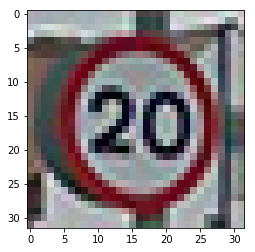

class  0 : score(93.394%) Speed limit (20km/h)
class  4 : score(5.022%) Speed limit (70km/h)
class  8 : score(1.270%) Speed limit (120km/h)
class  1 : score(0.313%) Speed limit (30km/h)
class  2 : score(0.001%) Speed limit (50km/h)
--------------------------------------------------------------------------------


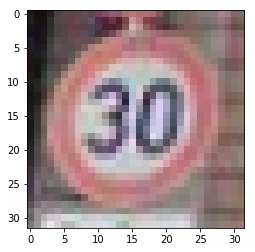

class  1 : score(100.000%) Speed limit (30km/h)
class  2 : score(0.000%) Speed limit (50km/h)
class  0 : score(0.000%) Speed limit (20km/h)
class  4 : score(0.000%) Speed limit (70km/h)
class  5 : score(0.000%) Speed limit (80km/h)
--------------------------------------------------------------------------------


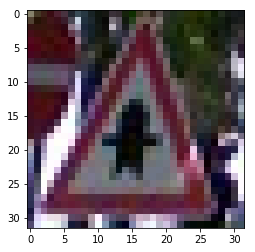

class 11 : score(51.790%) Right-of-way at the next intersection
class 27 : score(48.210%) Pedestrians
class 18 : score(0.000%) General caution
class 28 : score(0.000%) Children crossing
class 25 : score(0.000%) Road work
--------------------------------------------------------------------------------


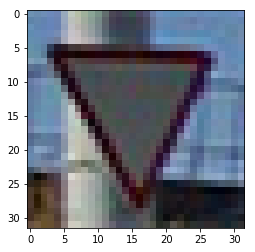

class 13 : score(100.000%) Yield
class  0 : score(0.000%) Speed limit (20km/h)
class  1 : score(0.000%) Speed limit (30km/h)
class  2 : score(0.000%) Speed limit (50km/h)
class  3 : score(0.000%) Speed limit (60km/h)
--------------------------------------------------------------------------------


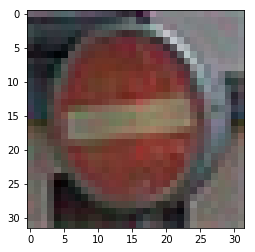

class 17 : score(100.000%) No entry
class 31 : score(0.000%) Wild animals crossing
class 14 : score(0.000%) Stop
class 10 : score(0.000%) No passing for vehicles over 3.5 metric tons
class  9 : score(0.000%) No passing
--------------------------------------------------------------------------------


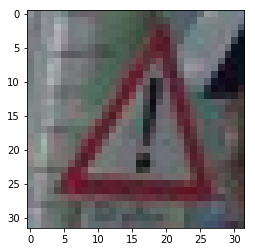

class 18 : score(100.000%) General caution
class  0 : score(0.000%) Speed limit (20km/h)
class  1 : score(0.000%) Speed limit (30km/h)
class  2 : score(0.000%) Speed limit (50km/h)
class  3 : score(0.000%) Speed limit (60km/h)
--------------------------------------------------------------------------------


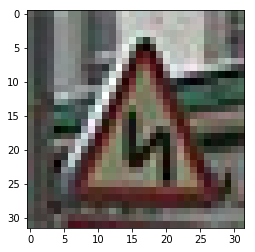

class 25 : score(73.560%) Road work
class 28 : score(26.397%) Children crossing
class 18 : score(0.028%) General caution
class 26 : score(0.006%) Traffic signals
class 20 : score(0.005%) Dangerous curve to the right
--------------------------------------------------------------------------------


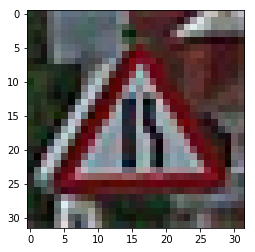

class 24 : score(97.695%) Road narrows on the right
class 25 : score(2.305%) Road work
class 29 : score(0.000%) Bicycles crossing
class 28 : score(0.000%) Children crossing
class 31 : score(0.000%) Wild animals crossing
--------------------------------------------------------------------------------


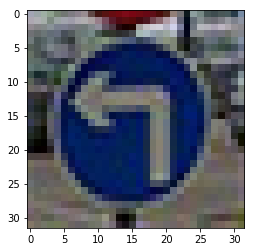

class 34 : score(100.000%) Turn left ahead
class 40 : score(0.000%) Roundabout mandatory
class 38 : score(0.000%) Keep right
class 16 : score(0.000%) Vehicles over 3.5 metric tons prohibited
class  4 : score(0.000%) Speed limit (70km/h)
--------------------------------------------------------------------------------


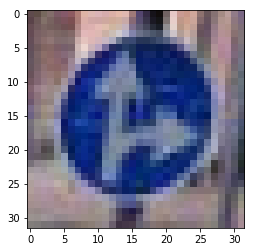

class 36 : score(100.000%) Go straight or right
class 38 : score(0.000%) Keep right
class 35 : score(0.000%) Ahead only
class 34 : score(0.000%) Turn left ahead
class  0 : score(0.000%) Speed limit (20km/h)
--------------------------------------------------------------------------------


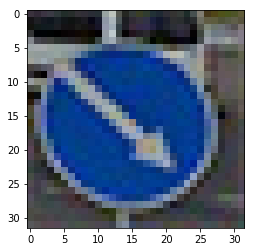

class 38 : score(100.000%) Keep right
class 34 : score(0.000%) Turn left ahead
class 40 : score(0.000%) Roundabout mandatory
class  2 : score(0.000%) Speed limit (50km/h)
class 12 : score(0.000%) Priority road
--------------------------------------------------------------------------------


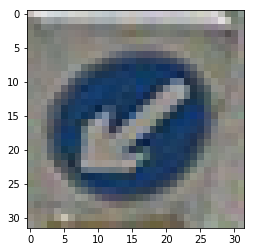

class 39 : score(100.000%) Keep left
class  0 : score(0.000%) Speed limit (20km/h)
class  1 : score(0.000%) Speed limit (30km/h)
class  2 : score(0.000%) Speed limit (50km/h)
class  3 : score(0.000%) Speed limit (60km/h)
--------------------------------------------------------------------------------


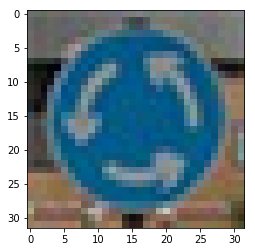

class 40 : score(100.000%) Roundabout mandatory
class 12 : score(0.000%) Priority road
class 38 : score(0.000%) Keep right
class  1 : score(0.000%) Speed limit (30km/h)
class  2 : score(0.000%) Speed limit (50km/h)
--------------------------------------------------------------------------------


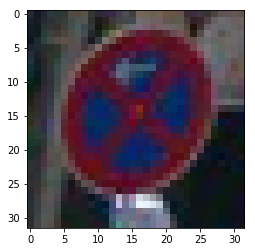

class 14 : score(99.981%) Stop
class 18 : score(0.019%) General caution
class 25 : score(0.000%) Road work
class 12 : score(0.000%) Priority road
class 13 : score(0.000%) Yield
--------------------------------------------------------------------------------


In [22]:
for i, (image, index, predict_value) in enumerate(zip(X_new_images, indices, values)):
    plt.imshow(image)
    plt.show()
    for idx, predict in zip(index, predict_value):
        print('class {:2d} : score({:.3f}%) {:s}'.format(idx, predict*100, sign_names[idx]))
    print('-' * 80)

#### I got 9 out of 10 correct. However, the probability of showing in the prediction of the fifth image('Double curve') seems to require another attempt.